# Unconstrained tapping demo: spontaneous and fastest tempo

**Authors:   Manuel Anglada-Tort, Peter Harrison, Nori Jacoby**

This demo shows how to apply _REPP_ in unconstrained tapping experiemnts. We include two examples:
1.    spontaneous tapping (or prefrred tempo) and
2.    fastest tempo.


In [36]:
# Before starting, set the right working dir and imports
import os
if 'path_to_dir' not in globals():
    path_to_dir = os.path.split(os.getcwd())[0]
os.chdir(path_to_dir)

# working directories for input and output files
input_dir = "input"
output_dir = "output"

import matplotlib
from matplotlib import pyplot as plt
import platform
if platform.system() == "Linux":
    pass
else:
    matplotlib.use('agg')
%matplotlib inline

# Import global parameters defined in config.py
from repp.config import sms_tapping

## 1a Recording phase: spontaneous tapping
Since this paradigm does not require SMS, we can skip the stimulus preparation step and start in the recording phase.

**Instructions:** Tap a steady beat in any tempo you like.

In [37]:
from repp.stimulus import REPPStimulus
# create stimulus
stimulus = REPPStimulus("preferred_tempo", config = sms_tapping)
filenames = stimulus.make_filenames()

In [38]:
import sounddevice as sd

# duration of the recording
duration = 10
fs = stimulus.config.FS

print(f"""
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
Tap a steady beat in any tempo during {duration} seconds
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
""")

myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
status = sd.wait()

# save recording to wav
REPPStimulus.to_wav(
    myrecording,
    os.path.join(output_dir,filenames['recording_filename']),
    fs
)


*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
Tap a steady beat in any tempo during 10 seconds
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***



## 1a Analysis: signal processing and performance analysis

In [39]:
from repp.analysis import REPPAnalysis

analysis = REPPAnalysis(config = sms_tapping)

audio_signals, extracted_onsets, stats = analysis.do_analysis_tapping_only(
    os.path.join(output_dir,filenames['recording_filename']),
    filenames['title_plot'],
    os.path.join(output_dir, filenames['plot_filename'])
)
print(extracted_onsets)

reading audio file:
fs=44100 len(samples)=441000
Tapping analysis...
Analysing results...
plot tapping data (tapping only)...
Plot saved
{'tapping_detected_onsets': array([1347.95454545, 1898.18181818, 2442.27272727, 3015.        ,
       3579.54545455, 4154.31818182, 4755.68181818, 5404.09090909,
       6052.5       , 6707.04545455, 7332.95454545, 7952.72727273,
       8576.59090909, 9173.86363636]), 'num_tapping_detected_onsets': 14}


<Figure size 1800x756 with 0 Axes>

In [40]:
import matplotlib as mpl
import matplotlib.image as mpimg
mpl.rcParams['figure.dpi']= 300
img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename']))
imgplot = plt.imshow(img)
plt.axis('off')

(-0.5, 7499.5, 3149.5, -0.5)

## 2a Recording phase: fastest tapping

**Instructions:** Tap a fast as you can.

In [31]:
# create stimulus
stimulus = REPPStimulus("fastest_tempo", config = sms_tapping)
filenames = stimulus.make_filenames()

In [41]:
import sounddevice as sd

# duration of the recording
duration = 5
fs = stimulus.config.FS

print(f"""
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
Tap the fastest you can during {duration} seconds
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
""")

myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
status = sd.wait()

# save recording to wav
REPPStimulus.to_wav(
    myrecording,
    os.path.join(output_dir,filenames['recording_filename']),
    stimulus.config.FS
)


*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
Tap the fastest you can during 5 seconds
*** *** *** *** *** *** *** *** *** *** *** *** *** *** ***



## 2b Analysis: signal processing and performance analysis

In [42]:
analysis = REPPAnalysis(config = sms_tapping)

audio_signals, extracted_onsets, stats = analysis.do_analysis_tapping_only(
    os.path.join(output_dir,filenames['recording_filename']),
    filenames['title_plot'],
    os.path.join(output_dir, filenames['plot_filename'])
)
print(extracted_onsets)

reading audio file:
fs=44100 len(samples)=220500
Tapping analysis...
Analysing results...
plot tapping data (tapping only)...
Plot saved
{'tapping_detected_onsets': array([ 726.13636364,  971.59090909, 1190.45454545, 1374.54545455,
       1556.59090909, 1716.13636364, 1867.5       , 2012.72727273,
       2162.04545455, 2307.27272727, 2452.5       , 2591.59090909,
       2749.09090909, 2888.18181818, 3035.45454545, 3180.68181818,
       3332.04545455, 3477.27272727, 3759.54545455, 3915.        ,
       4072.5       , 4230.        , 4379.31818182, 4545.        ]), 'num_tapping_detected_onsets': 24}


<Figure size 7500x3150 with 0 Axes>

(-0.5, 7499.5, 3149.5, -0.5)

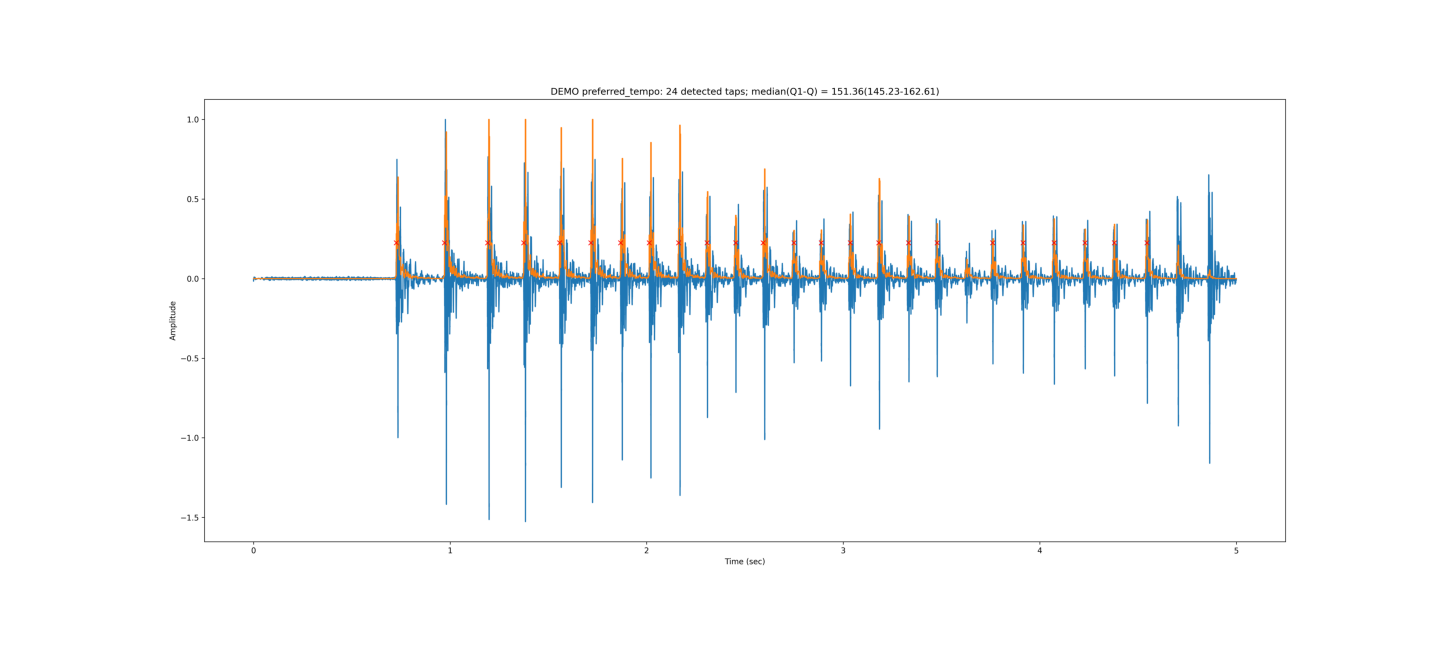

In [43]:
import matplotlib as mpl
import matplotlib.image as mpimg
mpl.rcParams['figure.dpi']= 300
img = mpimg.imread(os.path.join(output_dir, filenames['plot_filename']))
imgplot = plt.imshow(img)
plt.axis('off')